In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  mean_absolute_error,mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
link='https://drive.google.com/file/d/1yqYspG_RZy134lCsJTnzy5Ccy0u_P_ie/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df = pd.read_csv(path)

In [11]:
df

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,17355248,6754,https://www.zameen.com/Property/gulshan_e_maym...,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168442,17355249,680,https://www.zameen.com/Property/gadap_town_gul...,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,8.0,5-10 Marla
168443,17355250,6757,https://www.zameen.com/Property/gulshan_e_maym...,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168444,17355251,6752,https://www.zameen.com/Property/gulshan_e_maym...,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,7.8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,7.8,5-10 Marla


In [12]:
#chuyển đổi tiền pakistan thành tiền USD tỉ giá là 0.0035usd/1
df['Price_USD']=df['price']*0.0035

#đổi Marla và kanal ra mét vuông
df['Area Type'] = df['Area Type'].replace('Marla', '25.29285263')
df['Area Type'] = df['Area Type'].replace('Kanal', '505.8570526').astype(float)
df['Area_SQRT_M'] = round(df['Area Type']*df['Area Size'],2)
#bỏ những cột không cần dùng
df = df.drop(columns=['page_url', 'property_id','province_name','agency','agent','Area Category','area','Area Size','Area Type','price'])
df

,location_id,property_type,location,city,latitude,longitude,baths,purpose,bedrooms,date_added,Price_USD,Area_SQRT_M
0,3325,Flat,G-10,Islamabad,33.679890,73.012640,2,For Sale,2,02-04-2019,35000.0,101.17
1,3236,Flat,E-11,Islamabad,33.700993,72.971492,3,For Sale,3,05-04-2019,24150.0,141.64
2,764,House,G-15,Islamabad,33.631486,72.926559,6,For Sale,5,07-17-2019,57750.0,202.34
3,340,House,Bani Gala,Islamabad,33.707573,73.151199,4,For Sale,4,04-05-2019,152250.0,1011.71
4,3226,House,DHA Defence,Islamabad,33.492591,73.301339,3,For Sale,3,07-10-2019,24500.0,202.34
...,...,...,...,...,...,...,...,...,...,...,...,...
168441,6754,House,Gadap Town,Karachi,25.029909,67.137192,0,For Sale,6,07-18-2019,92750.0,242.81
168442,680,House,Gadap Town,Karachi,25.017951,67.136393,0,For Sale,3,07-18-2019,43750.0,202.34
168443,6757,House,Gadap Town,Karachi,25.015384,67.116330,0,For Sale,6,07-18-2019,94500.0,242.81
168444,6752,House,Gadap Town,Karachi,25.013265,67.120818,0,For Sale,3,07-18-2019,38500.0,197.28


In [13]:
from google.colab import files

df.to_csv('data.csv', index=False)

files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

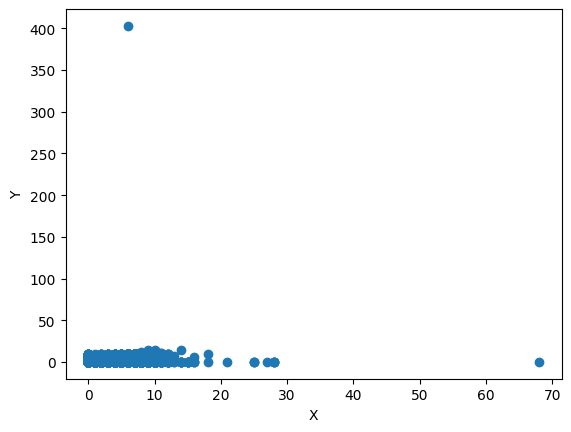

In [14]:
# Dữ liệu
x = df[['bedrooms']]
y = df[['baths']]
# Tạo scatter plot
plt.scatter(x, y)
# Đặt nhãn cho trục x và trục y
plt.xlabel('X')
plt.ylabel('Y')
# Hiển thị đồ thị
plt.show()

In [15]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   location_id    168446 non-null  int64  
 1   property_type  168446 non-null  object 
 2   location       168446 non-null  object 
 3   city           168446 non-null  object 
 4   latitude       168446 non-null  float64
 5   longitude      168446 non-null  float64
 6   baths          168446 non-null  int64  
 7   purpose        168446 non-null  object 
 8   bedrooms       168446 non-null  int64  
 9   date_added     168446 non-null  object 
 10  Price_USD      168446 non-null  float64
 11  Area_SQRT_M    168446 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 15.4+ MB


location_id      0
property_type    0
location         0
city             0
latitude         0
longitude        0
baths            0
purpose          0
bedrooms         0
date_added       0
Price_USD        0
Area_SQRT_M      0
dtype: int64

In [16]:
# Xác định ngưỡng để xác định outlier
outlier = 50
# Xóa bỏ các dòng dữ liệu chứa outlier
df = df[df['baths'] <= outlier]
df = df[df['bedrooms'] <= outlier]

In [17]:
df.info()
df.isnull().sum()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168444 entries, 0 to 168445
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   location_id    168444 non-null  int64  
 1   property_type  168444 non-null  object 
 2   location       168444 non-null  object 
 3   city           168444 non-null  object 
 4   latitude       168444 non-null  float64
 5   longitude      168444 non-null  float64
 6   baths          168444 non-null  int64  
 7   purpose        168444 non-null  object 
 8   bedrooms       168444 non-null  int64  
 9   date_added     168444 non-null  object 
 10  Price_USD      168444 non-null  float64
 11  Area_SQRT_M    168444 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 16.7+ MB


,location_id,property_type,location,city,latitude,longitude,baths,purpose,bedrooms,date_added,Price_USD,Area_SQRT_M
0,3325,Flat,G-10,Islamabad,33.679890,73.012640,2,For Sale,2,02-04-2019,35000.0,101.17
1,3236,Flat,E-11,Islamabad,33.700993,72.971492,3,For Sale,3,05-04-2019,24150.0,141.64
2,764,House,G-15,Islamabad,33.631486,72.926559,6,For Sale,5,07-17-2019,57750.0,202.34
3,340,House,Bani Gala,Islamabad,33.707573,73.151199,4,For Sale,4,04-05-2019,152250.0,1011.71
4,3226,House,DHA Defence,Islamabad,33.492591,73.301339,3,For Sale,3,07-10-2019,24500.0,202.34
...,...,...,...,...,...,...,...,...,...,...,...,...
168441,6754,House,Gadap Town,Karachi,25.029909,67.137192,0,For Sale,6,07-18-2019,92750.0,242.81
168442,680,House,Gadap Town,Karachi,25.017951,67.136393,0,For Sale,3,07-18-2019,43750.0,202.34
168443,6757,House,Gadap Town,Karachi,25.015384,67.116330,0,For Sale,6,07-18-2019,94500.0,242.81
168444,6752,House,Gadap Town,Karachi,25.013265,67.120818,0,For Sale,3,07-18-2019,38500.0,197.28


In [18]:
#sử dung labelencoder để đưa dữ liệu dạng số về dạng chữ
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['purpose'] = le.fit_transform(df['purpose'])
df['property_type'] = le.fit_transform(df['property_type'])
df['city'] = le.fit_transform(df['city'])
df

,location_id,property_type,location,city,latitude,longitude,baths,purpose,bedrooms,date_added,Price_USD,Area_SQRT_M
0,3325,1,G-10,1,33.679890,73.012640,2,1,2,02-04-2019,35000.0,101.17
1,3236,1,E-11,1,33.700993,72.971492,3,1,3,05-04-2019,24150.0,141.64
2,764,2,G-15,1,33.631486,72.926559,6,1,5,07-17-2019,57750.0,202.34
3,340,2,Bani Gala,1,33.707573,73.151199,4,1,4,04-05-2019,152250.0,1011.71
4,3226,2,DHA Defence,1,33.492591,73.301339,3,1,3,07-10-2019,24500.0,202.34
...,...,...,...,...,...,...,...,...,...,...,...,...
168441,6754,2,Gadap Town,2,25.029909,67.137192,0,1,6,07-18-2019,92750.0,242.81
168442,680,2,Gadap Town,2,25.017951,67.136393,0,1,3,07-18-2019,43750.0,202.34
168443,6757,2,Gadap Town,2,25.015384,67.116330,0,1,6,07-18-2019,94500.0,242.81
168444,6752,2,Gadap Town,2,25.013265,67.120818,0,1,3,07-18-2019,38500.0,197.28


In [19]:
#gán nhãn và chia tập
x = df[['purpose','property_type', 'Area_SQRT_M', 'city', 'longitude', 'latitude', 'baths','bedrooms']]
y = df['Price_USD']
#chia tập dữ liệu thành 80:20
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
#randomforest
# Xây dựng mô hình Random Forest với 100 cây
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Sử dụng mô hình để dự đoán trên tập kiểm thử
y_pred_randomforest = rf.predict(X_test)

# Đánh giá mô hình bằng cách tính toán sai số trung bình bình phương (mean squared error)

MAE_randomforest = mean_absolute_error(y_test,y_pred_randomforest)
MSE_randomforest = mean_squared_error(y_test,y_pred_randomforest)
RMSE_randomforest = np.sqrt(MSE_randomforest)

print("MAE: %f" % (MAE_randomforest))
print("RMSE: %f" % (RMSE_randomforest))
#điểm hiệu xuất R2 Score
print("R2 Score: ", r2_score(y_test,y_pred_randomforest))

MAE: 10679.048326
RMSE: 46911.641158
R2 Score:  0.8478605546454164


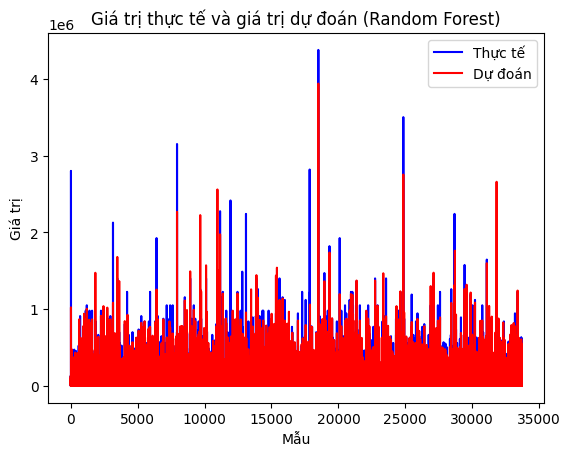

In [21]:
# Tạo một mảng chứa các chỉ số của tập kiểm thử
indices = range(len(y_test))

# Vẽ biểu đồ so sánh giá trị thực tế và giá trị dự đoán
plt.plot(indices, y_test, color='b', label='Thực tế')
plt.plot(indices, y_pred_randomforest, color='r', label='Dự đoán')

plt.xlabel('Mẫu')
plt.ylabel('Giá trị')
plt.title('Giá trị thực tế và giá trị dự đoán (Random Forest)')

plt.legend()
plt.show()

In [22]:
#DecisionTree
DecisionTree = DecisionTreeRegressor()
DecisionTree.fit(X_train, y_train)

# Dự đoán Rating cho dữ liệu kiểm tra
y_pred_DecisionTree = DecisionTree.predict(X_test)

# Đánh giá mô hình bằng cách tính toán sai số trung bình bình phương (mean squared error)

MAE_DecisionTree = mean_absolute_error(y_test,y_pred_DecisionTree)
MSE_DecisionTree = mean_squared_error(y_test,y_pred_DecisionTree)
RMSE_DecisionTree = np.sqrt(MSE_DecisionTree)

print("MAE: %f" % (MAE_DecisionTree))
print("RMSE: %f" % (RMSE_DecisionTree))
#điểm hiệu xuất R2 Score
print("R2 Score: ", r2_score(y_test,y_pred_DecisionTree))

MAE: 11875.369004
RMSE: 57003.486298
R2 Score:  0.7753619032937424


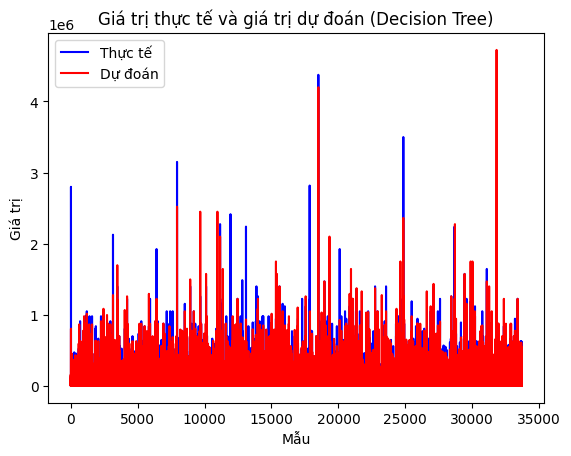

In [23]:
# Vẽ biểu đồ so sánh giá trị thực tế và giá trị dự đoán
plt.plot(indices, y_test, color='b', label='Thực tế')
plt.plot(indices, y_pred_DecisionTree, color='r', label='Dự đoán')

plt.xlabel('Mẫu')
plt.ylabel('Giá trị')
plt.title('Giá trị thực tế và giá trị dự đoán (Decision Tree)')

plt.legend()
plt.show()

In [24]:
#KNN
KNN = KNeighborsRegressor(n_neighbors=3)
KNN.fit(X_train, y_train)

# Dự đoán Rating cho dữ liệu kiểm tra
y_pred_KNN = KNN.predict(X_test)

# Đánh giá mô hình bằng cách tính toán sai số trung bình bình phương (mean squared error)

MAE_KNN = mean_absolute_error(y_test,y_pred_KNN)
MSE_KNN = mean_squared_error(y_test,y_pred_KNN)
RMSE_KNN = np.sqrt(MSE_KNN)

print("MAE: %f" % (MAE_KNN))
print("RMSE: %f" % (RMSE_KNN))
#điểm hiệu xuất R2 Score
print("R2 Score: ", r2_score(y_test,y_pred_KNN))

MAE: 16479.044298
RMSE: 70784.519180
R2 Score:  0.6536165382668695


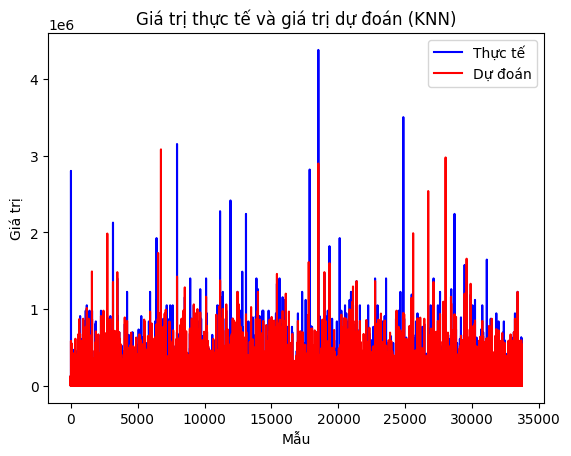

In [25]:

# Vẽ biểu đồ so sánh giá trị thực tế và giá trị dự đoán
plt.plot(indices, y_test, color='b', label='Thực tế')
plt.plot(indices, y_pred_KNN, color='r', label='Dự đoán')

plt.xlabel('Mẫu')
plt.ylabel('Giá trị')
plt.title('Giá trị thực tế và giá trị dự đoán (KNN)')

plt.legend()
plt.show()

In [26]:
#XGB
XGB = xgb.XGBRegressor()
XGB.fit(X_train, y_train)

# Dự đoán nhãn của tập kiểm tra
y_pred_XGB = XGB.predict(X_test)

# Đánh giá mô hình bằng cách tính toán sai số trung bình bình phương (mean squared error)

MAE_XGB = mean_absolute_error(y_test,y_pred_XGB)
MSE_XGB = mean_squared_error(y_test,y_pred_XGB)
RMSE_XGB = np.sqrt(MSE_XGB)

print("MAE: %f" % (MAE_XGB))
print("RMSE: %f" % (RMSE_XGB))
#điểm hiệu xuất R2 Score
print("R2 Score: ", r2_score(y_test,y_pred_XGB))

MAE: 13349.263682
RMSE: 50310.293297
R2 Score:  0.8250176382990069


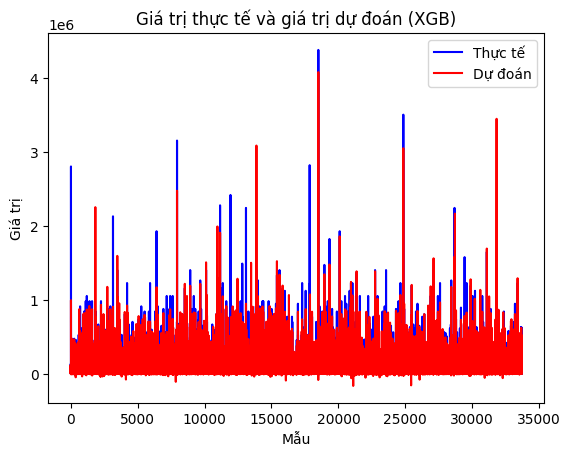

In [27]:
# Vẽ biểu đồ so sánh giá trị thực tế và giá trị dự đoán
plt.plot(indices, y_test, color='b', label='Thực tế')
plt.plot(indices, y_pred_XGB, color='r', label='Dự đoán')

plt.xlabel('Mẫu')
plt.ylabel('Giá trị')
plt.title('Giá trị thực tế và giá trị dự đoán (XGB)')

plt.legend()
plt.show()

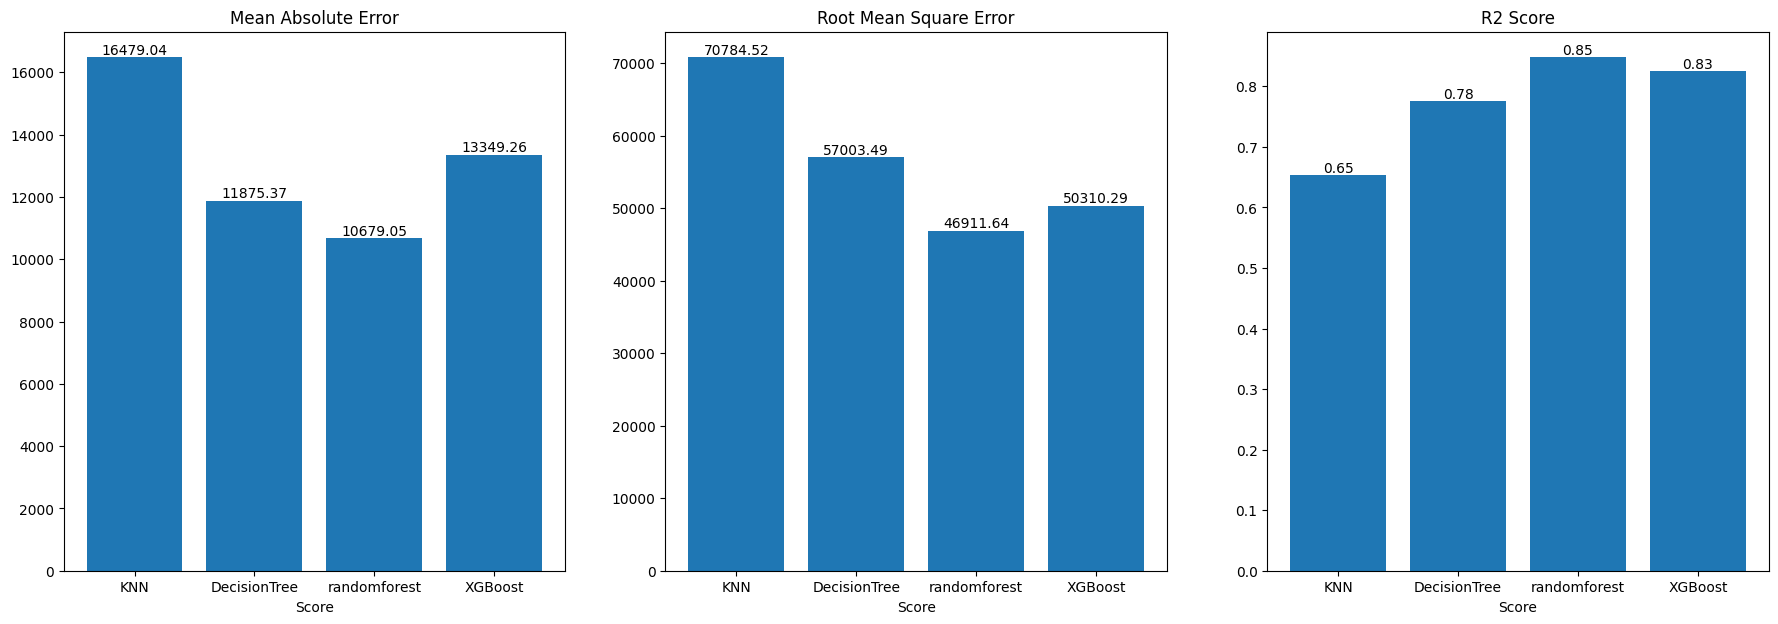

In [28]:
# Dữ liệu
MAE = {"KNN": MAE_KNN, "DecisionTree": MAE_DecisionTree, "randomforest": MAE_randomforest, "XGBoost": MAE_XGB}
RMSE = {"KNN": RMSE_KNN, "DecisionTree": RMSE_DecisionTree, "randomforest": RMSE_randomforest, "XGBoost": RMSE_XGB}
R2 = {"KNN": r2_score(y_test, y_pred_KNN), "DecisionTree": r2_score(y_test, y_pred_DecisionTree), "randomforest": r2_score(y_test, y_pred_randomforest), "XGBoost": r2_score(y_test, y_pred_XGB)}

# Tạo lưới với 1 hàng và 3 cột
fig, axes = plt.subplots(1, 3, figsize=(22, 7))

# Biểu đồ MAE
axes[0].bar(list(MAE.keys()), list(MAE.values()))
for i, v in enumerate(MAE.values()):
    axes[0].text(i, v, str(round(v, 2)), ha='center', va='bottom')
axes[0].set(title="Mean Absolute Error", xlabel="Score")

# Biểu đồ RMSE
axes[1].bar(list(RMSE.keys()), list(RMSE.values()))
for i, v in enumerate(RMSE.values()):
    axes[1].text(i, v, str(round(v, 2)), ha='center', va='bottom')
axes[1].set(title="Root Mean Square Error", xlabel="Score")


# Biểu đồ R2 Score
axes[2].bar(list(R2.keys()), list(R2.values()))
for i, v in enumerate(R2.values()):
    axes[2].text(i, v, str(round(v, 2)), ha='center', va='bottom')
axes[2].set(title="R2 Score", xlabel="Score")

plt.subplots_adjust(wspace=0.2)

# Hiển thị biểu đồ
plt.show()